In [1]:
# Import the dependencies
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import timeit

# # Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import Dependencies

from datetime import datetime

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress


In [2]:
def latitudes(size):
    
    latitude = []
    x = 0
    while x<size:
        random_lat = random.randint(-90, 89) + random.random()
        latitude.append(random_lat)
        x+=1
    return latitude
# Call the function with 1500
%timeit latitudes(1500)

1.6 ms ± 108 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [3]:
%timeit np.random.uniform(-90.000,90.000,size = 50)
# longitude

2.94 µs ± 71.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [4]:
lats = np.random.uniform(-90.000, 90.000, size =1500)
longs = np.random.uniform(-90.000, 90.000, size =1500)
lat_long = zip(lats, longs)

coordinates = list(lat_long)

In [5]:
# use the tuple() funciton to display the latitude and longitude combination

for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0],coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0],coordinate[1]).country_code)

bredasdorp za
taolanaro mg
tenenkou ml
victoria sc
kalmunai lk
bredasdorp za
bathsheba bb
torbay ca
barentsburg sj
hithadhoo mv
cape town za
stornoway gb
comodoro rivadavia ar
atar mr
doha kw
quatre cocos mu
kuva uz
hammerfest no
misratah ly
torbay ca
dolbeau ca
amderma ru
punta arenas cl
chernyakhiv ua
taoudenni ml
ponta do sol cv
hithadhoo mv
maniitsoq gl
port alfred za
kampene cd
zhanaozen kz
busselton au
bandrele yt
ushuaia ar
comodoro rivadavia ar
lagoa pt
cape town za
lebu cl
qaanaaq gl
mar del plata ar
ponta do sol cv
gornopravdinsk ru
saint george bm
kozhevnikovo ru
ouro preto do oeste br
tasiilaq gl
tahta eg
victoria sc
porto velho br
meiganga cm
ushuaia ar
maceio br
riachao br
bredasdorp za
qaanaaq gl
mar del plata ar
lebu cl
ulagan ru
lodja cd
lebu cl
east london za
illoqqortoormiut gl
taolanaro mg
busselton au
bredasdorp za
iqaluit ca
jamestown sh
hermanus za
narsaq gl
ushuaia ar
bandarbeyla so
georgetown sh
kot samaba pk
mar del plata ar
bayonet point us
oropoli hn
belushy

puerto quijarro bo
taolanaro mg
tasiilaq gl
punta arenas cl
east london za
salisbury us
ribeira grande pt
mahebourg mu
taolanaro mg
ribeira grande pt
belushya guba ru
altay cn
kruisfontein za
port elizabeth za
jamestown sh
clyde river ca
tsihombe mg
krasnoselkup ru
ushuaia ar
vila velha br
hamilton bm
ushuaia ar
saint george bm
mogadishu so
eyl so
storslett no
paamiut gl
qaanaaq gl
busselton au
liverpool ca
stepnogorsk kz
iqaluit ca
oranjestad aw
atar mr
ivnya ru
punta arenas cl
marcona pe
asfi ma
vila velha br
longyearbyen sj
hermanus za
qeshm ir
ushuaia ar
hermanus za
vila velha br
hermanus za
barentsburg sj
bredasdorp za
georgetown sh
bonavista ca
port alfred za
bredasdorp za
dikson ru
visby se
qaanaaq gl
cameta br
necochea ar
gat ly
ponta do sol cv
saint-philippe re
varkaus fi
bastia fr
punta arenas cl
grand-santi gf
ushuaia ar
chuy uy
port hawkesbury ca
kashi cn
reconquista ar
sao felix do xingu br
kidal ml
ushuaia ar
ushuaia ar
jamestown sh
dahra sn
mayumba ga
iqaluit ca
bredasdo

nanortalik gl
blagoyevo ru
busselton au
punta arenas cl
bathsheba bb
tsihombe mg
barentsburg sj
port elizabeth za
mar del plata ar
dangriga bz
qaanaaq gl
hermanus za
zhezkazgan kz
am timan td
mar del plata ar
amderma ru
coihaique cl
longyearbyen sj
umm lajj sa
sompeta in
mato verde br
ribeira grande pt
ushuaia ar
belushya guba ru
maceio br
longyearbyen sj
bambous virieux mu


In [6]:
# Create a list for holding the ciites
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #If the city is unique, the we add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


616

In [7]:
# Create an empty list to hold the weather data
city_data = []

# print the beginning of the logging

print("Beginning Data Retrieval      ")
print("------------------------------")

#Create counters

record_count = 1
set_count = 1

Beginning Data Retrieval      
------------------------------


In [8]:
#Starting URL for Weather Map API call

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d82315617a31ae0da2844e056aa6eee6


In [9]:
# Make a 'Get' request for the city weather
city_url = url +"&q=" + city.replace(" ","+")
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
if city_weather.status_code == 200:
    print(f"City Weather found.")
else: 
    print(f"City Weather not found.")

City Weather found.


In [11]:
# loop through all the cities

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes:
    if(i% 50 == 0 and i>=50):
        set_count +=1
        record_count +=1
    
    #create endpoint URL with each city
    city_url = url +"&q=" + city.replace(" ","+")
    
    #Log the url, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count}| {city} ")
    
    # Add 1 to the record count
    record_count +=1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1| bredasdorp 
Processing Record 2 of Set 1| taolanaro 
City not found. Skipping...
Processing Record 3 of Set 1| tenenkou 
Processing Record 4 of Set 1| victoria 
Processing Record 5 of Set 1| kalmunai 
Processing Record 6 of Set 1| bathsheba 
Processing Record 7 of Set 1| torbay 
Processing Record 8 of Set 1| barentsburg 
City not found. Skipping...
Processing Record 9 of Set 1| hithadhoo 
Processing Record 10 of Set 1| cape town 
Processing Record 11 of Set 1| stornoway 
Processing Record 12 of Set 1| comodoro rivadavia 
Processing Record 13 of Set 1| atar 
Processing Record 14 of Set 1| doha 
Processing Record 15 of Set 1| quatre cocos 
Processing Record 16 of Set 1| kuva 
City not found. Skipping...
Processing Record 17 of Set 1| hammerfest 
Processing Record 18 of Set 1| misratah 
Processing Record 19 of Set 1| dolbeau 
City not found. Skipping...
Processing Record 20 of Set 1| amderma 
City not found. Skipping...
Processing Record 21 of Set 1| punta ar

Processing Record 188 of Set 4| zhezkazgan 
Processing Record 189 of Set 4| baragaon 
Processing Record 190 of Set 4| clyde river 
Processing Record 191 of Set 4| stromness 
Processing Record 192 of Set 4| monrovia 
Processing Record 193 of Set 4| hvolsvollur 
Processing Record 194 of Set 4| saint-pierre 
Processing Record 195 of Set 4| cabedelo 
Processing Record 196 of Set 4| skagastrond 
City not found. Skipping...
Processing Record 197 of Set 4| coihaique 
Processing Record 198 of Set 4| awjilah 
Processing Record 199 of Set 4| tanda 
Processing Record 200 of Set 4| nampula 
Processing Record 201 of Set 4| caravelas 
Processing Record 202 of Set 4| carmen 
Processing Record 203 of Set 4| rumphi 
Processing Record 205 of Set 5| cap-aux-meules 
Processing Record 206 of Set 5| kisangani 
Processing Record 207 of Set 5| tucurui 
Processing Record 208 of Set 5| sisimiut 
Processing Record 209 of Set 5| giyani 
Processing Record 210 of Set 5| faya 
Processing Record 211 of Set 5| roald 


Processing Record 376 of Set 8| liverpool 
Processing Record 377 of Set 8| stepnogorsk 
Processing Record 378 of Set 8| oranjestad 
Processing Record 379 of Set 8| ivnya 
Processing Record 380 of Set 8| asfi 
Processing Record 381 of Set 8| qeshm 
Processing Record 382 of Set 8| bonavista 
Processing Record 383 of Set 8| cameta 
Processing Record 384 of Set 8| necochea 
Processing Record 385 of Set 8| varkaus 
Processing Record 386 of Set 8| bastia 
Processing Record 387 of Set 8| grand-santi 
Processing Record 388 of Set 8| port hawkesbury 
Processing Record 389 of Set 8| kashi 
Processing Record 390 of Set 8| reconquista 
Processing Record 391 of Set 8| kidal 
Processing Record 392 of Set 8| dahra 
Processing Record 393 of Set 8| mayumba 
Processing Record 394 of Set 8| shetpe 
Processing Record 395 of Set 8| barnstaple 
Processing Record 396 of Set 8| antsohihy 
Processing Record 397 of Set 8| murmino 
Processing Record 398 of Set 8| camacupa 
Processing Record 399 of Set 8| luis co

Processing Record 564 of Set 12| blessington 
Processing Record 565 of Set 12| malakal 
Processing Record 566 of Set 12| barra dos coqueiros 
Processing Record 567 of Set 12| karasburg 
Processing Record 568 of Set 12| portlethen 
Processing Record 569 of Set 12| onguday 
Processing Record 570 of Set 12| sukhobezvodnoye 
Processing Record 571 of Set 12| ushtobe 
Processing Record 572 of Set 12| cordoba 
Processing Record 573 of Set 12| catumbela 
Processing Record 574 of Set 12| antofagasta 
Processing Record 575 of Set 12| husavik 
Processing Record 576 of Set 12| ambilobe 
Processing Record 577 of Set 12| tukrah 
Processing Record 578 of Set 12| montepuez 
Processing Record 579 of Set 12| thunder bay 
Processing Record 580 of Set 12| vacha 
Processing Record 581 of Set 12| tacoronte 
Processing Record 582 of Set 12| sur 
Processing Record 583 of Set 12| manta 
Processing Record 584 of Set 12| laukaa 
Processing Record 585 of Set 12| nassau 
Processing Record 586 of Set 12| arlit 
Pro

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)


new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df= city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2021-09-21 01:50:02,-34.5322,20.0403,45.72,81,15,4.61
1,Tenenkou,ML,2021-09-21 01:50:02,14.4572,-4.9169,88.36,45,82,15.14
2,Victoria,HK,2021-09-21 01:50:04,22.2855,114.1577,87.76,72,69,0.81
3,Kalmunai,LK,2021-09-21 01:50:05,7.4167,81.8167,80.74,78,90,7.81
4,Bathsheba,BB,2021-09-21 01:50:05,13.2167,-59.5167,83.01,69,20,8.05
5,Torbay,CA,2021-09-21 01:45:49,47.6666,-52.7314,43.57,75,40,13.80
6,Hithadhoo,MV,2021-09-21 01:50:05,-0.6000,73.0833,83.26,73,100,12.26
7,Cape Town,ZA,2021-09-21 01:47:48,-33.9258,18.4232,50.41,76,20,8.05
8,Stornoway,GB,2021-09-21 01:50:06,58.2093,-6.3865,55.36,82,75,10.36
9,Comodoro Rivadavia,AR,2021-09-21 01:46:40,-45.8667,-67.5000,48.06,43,0,8.05


In [13]:
city_data_df.columns

Index(['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity',
       'Cloudiness', 'Wind Speed'],
      dtype='object')

In [14]:
# Create the output file (CSV).
output_data_file = "Weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

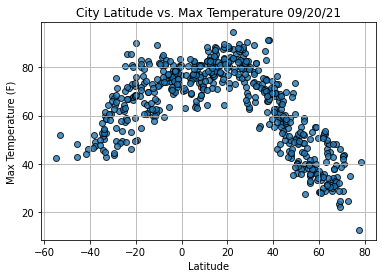

In [16]:
# Import time module
import time

#Build the scatter plot for latitude vs max temperature

plt.scatter(lats,
           max_temps,
           edgecolor ="black", linewidths =1,marker ='o',
            alpha = 0.8, label ="Cities")
            
#incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig1.png")

# Show plot.
plt.show()

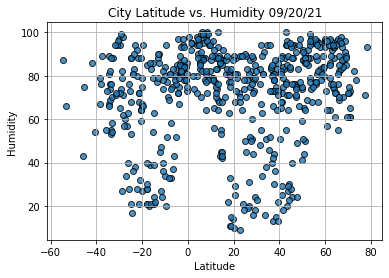

In [17]:
#Build the scatter plot for latitude vs Humidity

plt.scatter(lats,
           humidity,
           edgecolor ="black", linewidths =1,marker ='o',
            alpha = 0.8, label ="Cities")
            
#incorporate other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig2.png")

# Show plot.
plt.show()

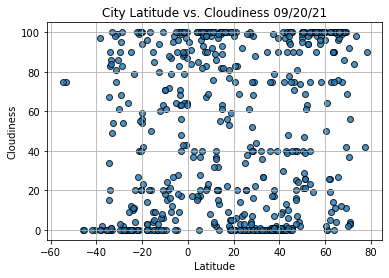

In [18]:
#Build the scatter plot for latitude vs Cloudiness

plt.scatter(lats,
           cloudiness,
           edgecolor ="black", linewidths =1,marker ='o',
            alpha = 0.8, label ="Cities")
            
#incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig3.png")

# Show plot.
plt.show()

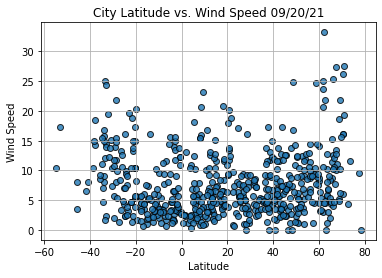

In [19]:
#Build the scatter plot for latitude vs windspeed

plt.scatter(lats,
           wind_speed,
           edgecolor ="black", linewidths =1,marker ='o',
            alpha = 0.8, label ="Cities")
            
#incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather_data/Fig4.png")

# Show plot.
plt.show()

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                   Hammerfest
Country                        NO
Date          2021-09-21 01:50:07
Lat                       70.6634
Lng                       23.6821
Max Temp                    43.25
Humidity                       61
Cloudiness                      3
Wind Speed                  16.11
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0


0      False
1       True
2       True
3       True
4       True
       ...  
571     True
572     True
573     True
574     True
575    False
Name: Lat, Length: 576, dtype: bool

In [23]:
northern_hemi_df =city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df =city_data_df.loc[(city_data_df["Lat"] < 0)]

-0.8442488214327233


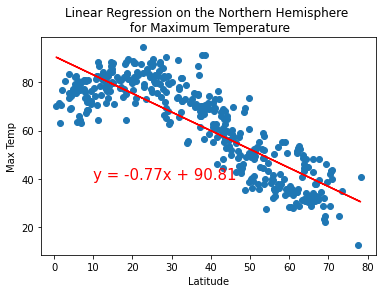

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(10,40))

0.7221771670909989


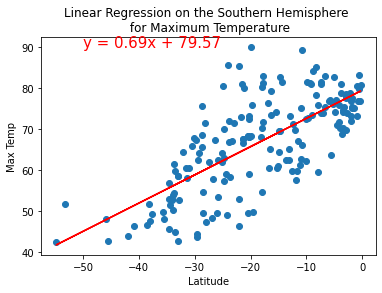

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,90))

0.06567449588802043


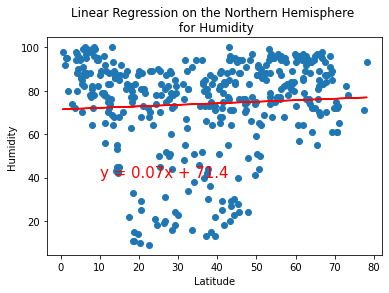

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Humidity', 
                       'Humidity',(10,40))

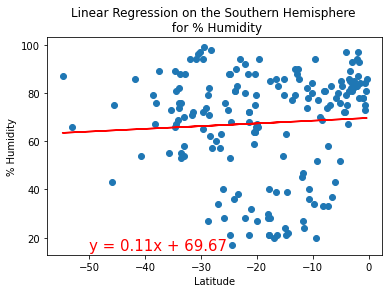

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

0.09680744579581269


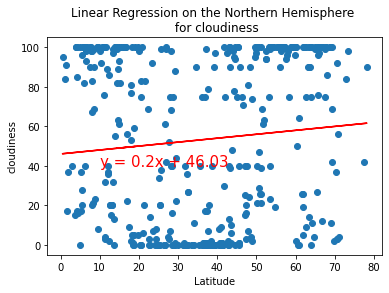

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for cloudiness', 
                       'cloudiness',(10,40))

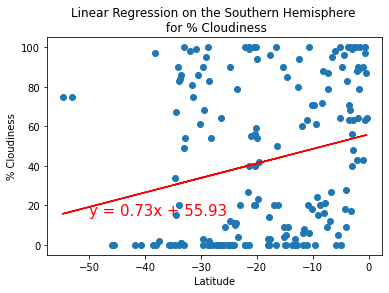

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,15))

0.23446576671559938


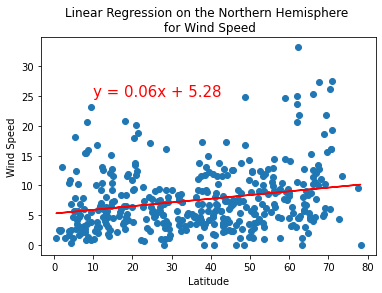

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(10,25))

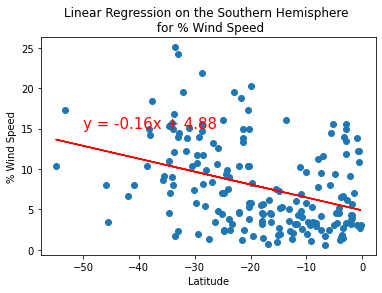

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Wind Speed', '% Wind Speed',(-50,15))